### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

# IMPORT PACKAGES AND DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

# 1.Prepare The Dataset

### Data summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  20000 non-null object
date                              20000 non-null int64
device                            20000 non-null object
fullVisitorId                     20000 non-null uint64
geoNetwork                        20000 non-null object
hits                              20000 non-null object
socialEngagementType              20000 non-null object
trafficSource                     20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float6

In [4]:
df.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,9873.0,20000.000000,15088.0,19999.000000,9120.000000,10101.000000,1.930000e+02,1.930000e+02,196.000000,20000.0
mean,2.017041e+07,4.533406e+18,1.498277e+09,2.264200,1.498277e+09,1.0,4.794450,1.0,3.971549,4.456140,264.244629,1.278192e+08,1.087636e+08,1.040816,1.0
std,4.737638e+03,3.067707e+18,1.565797e+07,7.876636,1.565797e+07,0.0,9.080243,0.0,6.498605,12.593541,459.176173,2.432262e+08,1.711924e+08,0.222727,0.0
min,2.016090e+07,8.864048e+13,1.472799e+09,1.000000,1.472800e+09,1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.990000e+06,1.990000e+06,1.000000,1.0
25%,2.017020e+07,1.618305e+18,1.486118e+09,1.000000,1.486118e+09,1.0,1.000000,1.0,1.000000,1.000000,35.000000,2.799000e+07,2.102000e+07,1.000000,1.0
50%,2.017062e+07,4.446795e+18,1.498247e+09,1.000000,1.498247e+09,1.0,2.000000,1.0,2.000000,1.000000,94.000000,5.171000e+07,4.458000e+07,1.000000,1.0
75%,2.017113e+07,7.218982e+18,1.512038e+09,1.000000,1.512038e+09,1.0,5.000000,1.0,4.000000,1.000000,270.000000,1.141600e+08,1.087200e+08,1.000000,1.0
max,2.018042e+07,9.999250e+18,1.523862e+09,401.000000,1.523862e+09,1.0,229.000000,1.0,165.000000,96.000000,5553.000000,2.103690e+09,1.171470e+09,3.000000,1.0


In the total_transactionRevenue column, there are a lot of missing data (which will be replaced by 0). Only 193 over 20000 row has value in  total_transactionRevenue column.

In [5]:
df.describe(include = 'O')

,channelGrouping,customDimensions,device,geoNetwork,hits,socialEngagementType,trafficSource
count,20000,20000,20000,20000,20000,20000,20000
unique,7,6,73,3788,19554,1,1369
top,Organic Search,"[{'index': '4', 'value': 'North America'}]",{'mobileDeviceInfo': 'not available in demo da...,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '6', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ..."
freq,9535,9288,6078,1600,12,20000,4944


In [6]:
df.iloc[:,:11].head(5)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,visitNumber
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,6
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,1


In [7]:
df.iloc[:,11:21].head(5)

,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions
0,1508198450,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,1508176307,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN
2,1508201613,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN
3,1508169851,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN
4,1508190552,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN


Looking at the table above, we can see that there are JSON data in these columns: customerDimensions, device, geoNetwork, hits, trafficSource. The next step is to flatten these columns into pandas dataframes. Then, I will explore each of those dataframes and decide which columns are going to be used to predict the total revenue. After that, those columns will be concatenated to df.

In [8]:
import json
import ast
from pandas.io.json import json_normalize #package for flattening json in pandas df

customDimensions and hits column have the same format, which is different from the other 3 columns. Thus, I will flatten customDimensions and hits first. The format of device, geoNetwork, and trafficSource is string with the form of dictionary while that of customDimensions and hits is string with the form of a list that has 1 dictionary as an item.

##### customerDimensions

First, I need to fill the rows with empty list of the column

In [9]:
x = str([{'index': 'xxx','value': 'unknown'}])

In [10]:
for i in df['customDimensions']:
    if ast.literal_eval(i) == []:
        df['customDimensions'].replace(i,x,inplace = True)

In [11]:
ast.literal_eval(df['customDimensions'].iloc[19999])

[{'index': 'xxx', 'value': 'unknown'}]

After that, I will transform the data and use json_normalize function to flatten the data in customDimensions column into a dataframe named cust_Dim

In [12]:
df['customDimensions'] = df['customDimensions'].apply(lambda x: ast.literal_eval(x))
df['customDimensions']= df['customDimensions'].apply(lambda x: x[0])
df['customDimensions'] = df['customDimensions'].apply(lambda x: str(x))

In [13]:
cust_Dim = json_normalize(df['customDimensions'].apply(eval))
cust_Dim.replace('xxx',np.nan,inplace = True)

In [14]:
cust_Dim.head()

,index,value
0,4,EMEA
1,4,North America
2,4,North America
3,4,EMEA
4,4,Central America


In [15]:
cust_Dim.value.unique()

array(['EMEA', 'North America', 'Central America', 'unknown', 'APAC',
       'South America'], dtype=object)

In [16]:
# Need to concat cust_Dim to df and drop all cust_Dim columns and customDimensions

In [17]:
cust_Dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
index    16395 non-null object
value    20000 non-null object
dtypes: object(2)
memory usage: 312.6+ KB


The column value in cust_Dim table identifies the location of customers. I will include this in my model by turning it into one-hot vector and concatenate with df.

In [18]:
value = pd.get_dummies(cust_Dim['value'],columns = 'values', prefix = 'value')

##### hits - apply the same steps as above, data is stored in hits table

In [19]:
list(ast.literal_eval(df['hits'].iloc[0])[0].keys())

['hitNumber',
 'time',
 'hour',
 'minute',
 'isInteraction',
 'isEntrance',
 'isExit',
 'referer',
 'page',
 'transaction',
 'item',
 'appInfo',
 'exceptionInfo',
 'product',
 'promotion',
 'eCommerceAction',
 'experiment',
 'customVariables',
 'customDimensions',
 'customMetrics',
 'type',
 'social',
 'contentGroup',
 'dataSource',
 'publisher_infos']

In [20]:
x = str([{'hitNumber':'xxx', 'time':'xxx', 'hour':'xxx', 'minute':'xxx', 'isInteraction':'xxx', 'isEntrance':'xxx', 'isExit':'xxx', 'referer':'xxx', 'page':'xxx', 'transaction':'xxx', 'item':'xxx',
          'appInfo':'xxx','exceptionInfo':'xxx','product':'xxx','promotion':'xxx','eCommerceAction':'xxx', 'experiment':'xxx', 'customVariables':'xxx', 'customDimensions':'xxx',
          'customMetrics':'xxx', 'type':'xxx','social':'xxx','contentGroup':'xxx','dataSource':'xxx','publisher_infos':'xxx'}])

In [21]:
for i in df['hits']:
    if ast.literal_eval(i) == []:
        df['hits'].replace(i,x,inplace = True)

In [22]:
df['hits'] = df['hits'].apply(lambda x: ast.literal_eval(x))
df['hits']= df['hits'].apply(lambda x: x[0])
df['hits'] = df['hits'].apply(lambda x: str(x))

In [23]:
hits = json_normalize(df['hits'].apply(eval))
hits.replace('xxx',np.nan,inplace = True)

In [24]:
## hits.columns

In [25]:
hits.head()

,appInfo,appInfo.exitScreenName,appInfo.landingScreenName,appInfo.screenDepth,appInfo.screenName,contentGroup,contentGroup.contentGroup1,contentGroup.contentGroup2,contentGroup.contentGroup3,contentGroup.contentGroup4,...,publisher_infos,referer,social,social.hasSocialSourceReferral,social.socialInteractionNetworkAction,social.socialNetwork,time,transaction,transaction.currencyCode,type
0,NaN,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,0,shop.googlemerchandisestore.com/google+redesig...,NaN,(not set),Bags,(not set),(not set),...,[],https://www.google.co.uk/search?q=water+bottle...,NaN,No,:,(not set),0,NaN,USD,PAGE
1,NaN,shop.googlemerchandisestore.com/asearch.html,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,NaN,(not set),(not set),(not set),(not set),...,[],https://sites.google.com/a/google.com/transpor...,NaN,No,:,(not set),0,NaN,NaN,PAGE
2,NaN,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,NaN,(not set),(not set),(not set),(not set),...,[],https://www.googlemerchandisestore.com/,NaN,No,:,(not set),0,NaN,NaN,PAGE
3,NaN,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,NaN,(not set),(not set),(not set),(not set),...,[],https://www.google.com.tr/,NaN,No,:,(not set),0,NaN,NaN,PAGE
4,NaN,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,NaN,(not set),(not set),(not set),(not set),...,[],https://www.google.com.mx/,NaN,No,:,(not set),0,NaN,NaN,PAGE


In [26]:
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 64 columns):
appInfo                                  0 non-null float64
appInfo.exitScreenName                   19994 non-null object
appInfo.landingScreenName                19994 non-null object
appInfo.screenDepth                      19994 non-null object
appInfo.screenName                       19994 non-null object
contentGroup                             0 non-null float64
contentGroup.contentGroup1               19994 non-null object
contentGroup.contentGroup2               19994 non-null object
contentGroup.contentGroup3               19994 non-null object
contentGroup.contentGroup4               19994 non-null object
contentGroup.contentGroup5               19994 non-null object
contentGroup.contentGroupUniqueViews1    80 non-null object
contentGroup.contentGroupUniqueViews2    7069 non-null object
contentGroup.contentGroupUniqueViews3    561 non-null object
contentGroup.previous

In [27]:
hits['hitNumber'].unique()

array(['1', '2', '13', '7', '3', '9', '32', nan, '8', '20', '10', '16',
       '5', '6'], dtype=object)

The goal is to predict the total transaction revenue, so I will only use the hitNumber columns to run my model after scanning through the columns' names in the hits table. The value of hitNumber needs to be converted to integer.

In [28]:
hits['hitNumber'] = hits['hitNumber'].apply(lambda x: x if pd.isnull(x) else int(x))

Then fill the NaN value with 0

In [29]:
hits['hitNumber'].fillna(0, inplace=True)

### Transform geoNetwork, device and trafficSource to dataframe

##### geoNetwork

In [30]:
geo_Network = json_normalize(df['geoNetwork'].apply(eval))

In [31]:
geo_Network.head()

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
0,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe
1,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America
2,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercable.net,not available in demo dataset,not available in demo dataset,Northern America
3,not available in demo dataset,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Western Asia
4,not available in demo dataset,not available in demo dataset,Americas,Mexico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,not available in demo dataset,Central America


In [32]:
geo_Network.describe()

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,162,1,6,155,1,1,32,2516,1,125,22
top,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Northern America
freq,11342,20000,10521,8663,20000,20000,11342,5849,20000,11342,9287


In [33]:
geo_Network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
city               20000 non-null object
cityId             20000 non-null object
continent          20000 non-null object
country            20000 non-null object
latitude           20000 non-null object
longitude          20000 non-null object
metro              20000 non-null object
networkDomain      20000 non-null object
networkLocation    20000 non-null object
region             20000 non-null object
subContinent       20000 non-null object
dtypes: object(11)
memory usage: 1.7+ MB


In [34]:
geo_Network.continent.unique()

array(['Europe', 'Americas', 'Asia', 'Oceania', '(not set)', 'Africa'],
      dtype=object)

Continent will be used to predict the total revenue. I will include this in my model by turning it into one-hot vector and concatenate with df.

In [35]:
continent = pd.get_dummies(geo_Network['continent'],columns = 'continents', prefix = 'continent')

In [36]:
##geo_Network.city.unique()

##### device

In [37]:
device = json_normalize(df['device'].apply(eval))

In [38]:
device.head(10)

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
5,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset
6,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset
7,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
8,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset
9,Safari,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in dem

In [39]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
browser                      20000 non-null object
browserSize                  20000 non-null object
browserVersion               20000 non-null object
deviceCategory               20000 non-null object
flashVersion                 20000 non-null object
isMobile                     20000 non-null bool
language                     20000 non-null object
mobileDeviceBranding         20000 non-null object
mobileDeviceInfo             20000 non-null object
mobileDeviceMarketingName    20000 non-null object
mobileDeviceModel            20000 non-null object
mobileInputSelector          20000 non-null object
operatingSystem              20000 non-null object
operatingSystemVersion       20000 non-null object
screenColors                 20000 non-null object
screenResolution             20000 non-null object
dtypes: bool(1), object(15)
memory usage: 2.3+ MB


In [40]:
device.describe()

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,25,1,1,3,1,2,1,1,1,1,1,1,16,1,1,1
top,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
freq,13978,20000,20000,13988,20000,13985,20000,20000,20000,20000,20000,20000,7651,20000,20000,20000


deviceCategory and isMobile will be used to predict the total revenue. Even though, browser and operatingSystem store some information that can be useful to predict total revenue, both columns have nearly 50% missing data. Furthermore, there are many labels in each columns. Since I intend to use KNN Regressor and Linear Regression, I have to use one-hot vector to transform these columns and this is not a good idea. Except the four mentionded columns, other columns do not have any variation, that's why I excluded them.

In [41]:
deviceCategory = pd.get_dummies(device['deviceCategory'],columns = 'deviceCategory', prefix = 'deviceCategory')

In [42]:
isMobile =  pd.get_dummies(device['isMobile'],columns = 'isMobile', prefix = 'isMobile')

##### trafficSource

In [43]:
trafficSource = json_normalize(df['trafficSource'].apply(eval))

In [44]:
trafficSource.head()

,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.criteriaParameters,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
3,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [45]:
trafficSource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
adContent                              521 non-null object
adwordsClickInfo.adNetworkType         630 non-null object
adwordsClickInfo.criteriaParameters    20000 non-null object
adwordsClickInfo.gclId                 633 non-null object
adwordsClickInfo.isVideoAd             630 non-null object
adwordsClickInfo.page                  630 non-null object
adwordsClickInfo.slot                  630 non-null object
campaign                               20000 non-null object
isTrueDirect                           6333 non-null object
keyword                                6790 non-null object
medium                                 20000 non-null object
referralPath                           6104 non-null object
source                                 20000 non-null object
dtypes: object(13)
memory usage: 2.0+ MB


In [46]:
trafficSource.describe()

,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.criteriaParameters,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
count,521,630,20000,633,630,630,630,20000,6333,6790,20000,6104,20000
unique,34,2,1,595,1,3,2,17,1,112,6,469,78
top,Google Merchandise Store,Google Search,not available in demo dataset,CjwKEAjw-LLKBRCdhqmwtYmX93kSJAAORDM6K_vERGGpVE...,False,1,Top,(not set),True,(not provided),(none),/,(direct)
freq,261,364,20000,3,630,617,363,19058,6333,6131,8198,1709,8198


In [47]:
trafficSource['medium'].unique()

array(['organic', 'referral', '(none)', 'cpc', 'affiliate', 'cpm'],
      dtype=object)

trafficSource includes many columns with severe missing data (around 14000 over 20000 data points). Only medium column will be included in predicting the total revenue.

In [48]:
medium = pd.get_dummies(trafficSource['medium'],columns = 'medium', prefix = 'medium')

### Drop the flattened columns 

In [49]:
df.drop(['customDimensions', 'device', 'geoNetwork', 'hits', 'trafficSource'],axis=1,inplace=True)

### Concatenate the chosen columns to form the prepared dataset.

In [50]:
df = pd.concat([df,value,hits['hitNumber'],continent,deviceCategory,medium,isMobile],axis=1)

In [51]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,...,deviceCategory_mobile,deviceCategory_tablet,medium_(none),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,isMobile_False,isMobile_True
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,...,0,0,0,0,0,0,1,0,1,0
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,NaN,2,NaN,...,0,0,0,0,0,0,0,1,1,0
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,NaN,2,1.0,...,1,0,1,0,0,0,0,0,0,1
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,NaN,2,1.0,...,0,0,0,0,0,0,1,0,1,0
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,NaN,2,1.0,...,0,0,0,0,0,0,1,0,1,0


Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
channelGrouping                   20000 non-null object
date                              20000 non-null int64
fullVisitorId                     20000 non-null uint64
socialEngagementType              20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float64
totals_sessionQualityDim          9120 non-null float64
totals_timeOnSite                 10101 non-null float64
totals_totalTransactionRevenue    193 non-null float64
totals_transactionRevenue         193 non-null float64
totals_transactions               196 non-null float64


I assume that all the missing values were there because there was nothing to record. Thus, I will NaN with 0 for these columns: totals_transactionRevenue, totals_totalTransactionRevenue, totals_transactions, totals_bounces, totals_newVisits, totals_pageviews, totals_sessionQualityDim, totals_timeOnSite

In [53]:
df['totals_transactionRevenue'].fillna(0, inplace=True)
df['totals_totalTransactionRevenue'].fillna(0, inplace=True)
df['totals_transactions'].fillna(0, inplace=True)
df['totals_bounces'].fillna(0, inplace=True)
df['totals_newVisits'].fillna(0, inplace=True)
df['totals_pageviews'].fillna(0, inplace=True)
df['totals_sessionQualityDim'].fillna(0, inplace=True)
df['totals_timeOnSite'].fillna(0, inplace=True)

In [54]:
grp_channel = df.groupby(['channelGrouping']).agg({'totals_transactionRevenue':np.mean,'fullVisitorId':'count'})

In [55]:
grp_channel 

,totals_transactionRevenue,fullVisitorId
channelGrouping,,
Affiliates,0.000000e+00,425
Direct,1.183905e+06,3047
Display,1.734503e+06,362
Organic Search,4.776182e+05,9535
Paid Search,1.368254e+06,527
Referral,4.334077e+06,2649
Social,0.000000e+00,3455


The total revenue for Affiliates and Social group are currently 0. Thus, I will drop these groups from the data (around 4000 zeros will be dropped, which can help the data becomes less unbalanced)

In [56]:
df = df[(df['channelGrouping']=='Direct')|(df['channelGrouping']=='Display')|
   (df['channelGrouping']=='Organic Search')|(df['channelGrouping']=='Paid Search')|(df['channelGrouping']=='Referral')]

In [57]:
df['channelGrouping'].unique()

array(['Organic Search', 'Referral', 'Direct', 'Paid Search', 'Display'],
      dtype=object)

In [58]:
channelGrouping = pd.get_dummies(df['channelGrouping'],columns = 'channelGrouping', prefix = 'channelGrouping')
df.drop(['channelGrouping'],axis=1,inplace=True)
df = pd.concat([df,channelGrouping],axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16120 entries, 0 to 19999
Data columns (total 45 columns):
date                              16120 non-null int64
fullVisitorId                     16120 non-null uint64
socialEngagementType              16120 non-null object
visitId                           16120 non-null int64
visitNumber                       16120 non-null int64
visitStartTime                    16120 non-null int64
totals_bounces                    16120 non-null float64
totals_hits                       16120 non-null int64
totals_newVisits                  16120 non-null float64
totals_pageviews                  16120 non-null float64
totals_sessionQualityDim          16120 non-null float64
totals_timeOnSite                 16120 non-null float64
totals_totalTransactionRevenue    16120 non-null float64
totals_transactionRevenue         16120 non-null float64
totals_transactions               16120 non-null float64
totals_visits                     16120 non-null

Create a Revenue_check column which will take value 0 if totals_transactionRevenue = 0, otherwise it will take value 1.

In [60]:
df['Revenue_check'] = df['totals_transactionRevenue'].apply(lambda x: int(x >0))

### Choosing which varible to be included in the target set and the feature set:

The goal is to predict the column totals_transactionRevenue. Thus the target is:

In [61]:
y = df['totals_transactionRevenue']

Based on the description of the other variables, I will decide which variable are the most related to the target variable in order to predict the target variable.

In [62]:
df.columns

Index(['date', 'fullVisitorId', 'socialEngagementType', 'visitId',
       'visitNumber', 'visitStartTime', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim',
       'totals_timeOnSite', 'totals_totalTransactionRevenue',
       'totals_transactionRevenue', 'totals_transactions', 'totals_visits',
       'value_APAC', 'value_Central America', 'value_EMEA',
       'value_North America', 'value_South America', 'value_unknown',
       'hitNumber', 'continent_(not set)', 'continent_Africa',
       'continent_Americas', 'continent_Asia', 'continent_Europe',
       'continent_Oceania', 'deviceCategory_desktop', 'deviceCategory_mobile',
       'deviceCategory_tablet', 'medium_(none)', 'medium_affiliate',
       'medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
       'isMobile_False', 'isMobile_True', 'channelGrouping_Direct',
       'channelGrouping_Display', 'channelGrouping_Organic Search',
       'channelGrouping_Paid Se

In [63]:
df.head()

,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,...,medium_organic,medium_referral,isMobile_False,isMobile_True,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,Revenue_check
0,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,1.0,...,1,0,1,0,0,0,1,0,0,0
1,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,0.0,2,0.0,2.0,...,0,1,1,0,0,0,0,0,1,0
2,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,0.0,2,1.0,2.0,...,0,0,0,1,1,0,0,0,0,0
3,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,0.0,2,1.0,2.0,...,1,0,1,0,0,0,1,0,0,0
4,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,0.0,2,1.0,2.0,...,1,0,1,0,0,0,1,0,0,0


date, fullVisitorID, visitID, visitStartTime will be excluded from the feature set.

In [64]:
df['socialEngagementType'].unique()

array(['Not Socially Engaged'], dtype=object)

socialEngagementType will also be excluded since there is no variation in this variable.

The feature set X will be:

In [65]:
df['totals_timeOnSite'].unique()

array([   0.,   28.,   38., ..., 2099., 3708., 5276.])

In [66]:
df['totals_pageviews'].dtypes

dtype('float64')

In [67]:
X = df[['visitNumber','totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim','totals_timeOnSite','totals_transactions', 'totals_visits',
        'value_APAC', 'value_Central America', 'value_EMEA','value_North America', 'value_South America', 'value_unknown',
        'hitNumber',
        'continent_(not set)', 'continent_Africa','continent_Americas', 'continent_Asia', 'continent_Europe','continent_Oceania', 
        'deviceCategory_desktop', 'deviceCategory_mobile','deviceCategory_tablet',
        'medium_(none)', 'medium_affiliate','medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
       'channelGrouping_Direct', 'channelGrouping_Display', 'channelGrouping_Organic Search', 
        'channelGrouping_Paid Search', 'channelGrouping_Referral', 'isMobile_True','isMobile_False']]

## Check for Data Leakage

In [68]:
feature = X.values
target = y

corr_list1 = []; 
for i in range(0,len(X.columns)):
   corr_list1.append(np.corrcoef(feature[:,i] , target)[0,1])

print(corr_list1)

[0.010407919150734085, -0.05448502150519769, 0.2662901408899433, -0.06210352069574997, 0.27487349726779564, 0.10001369541008932, 0.14634560599199029, 0.5478378515433695, nan, -0.020094555412971834, -0.005914685436130502, -0.02784126020307301, 0.052796574403364604, -0.007815060712716084, -0.02127476915156817, -0.0016991376396389357, -0.0015388050519238845, -0.005668560139326829, 0.04916571440858379, -0.02479997908558722, -0.03172376328998046, -0.008095434821325973, 0.034654520154182515, -0.03182893873200064, -0.009666974322122162, 0.031565841571247026, nan, -0.00021982435541709842, 0.017800829932557008, -0.02836387410151051, -0.013733545665159773, -0.0025824961764516004, 0.0029630745701394396, -0.04487030611033117, 0.0005491882284552748, 0.06079935694567917, -0.03467270225154891, 0.03467270225154891]


c:\program files\python\python36\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\program files\python\python36\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [69]:
for i in corr_list1:
    if i > 0.9:
        print(i)

No data leakage detected

### Split and scale the dataset:

In [70]:
from sklearn.model_selection import train_test_split
X_train_org,X_test_org,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=12)

With the regression task, I am going to use StandardScaler to scale the dataset since StandardScaler will smooth out the outliers in the dataset and gives us better result.

In [71]:
from sklearn.preprocessing import StandardScaler ## minmax is better for classification and standard for regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# 2. Build model

### Training models:

Using  cross validation score with 5 folds, I will train the data with the following models: KNN Regressor, Linear Regression (normal equation), and polyniomial. Grid search will be used along side with cross validation in order to find the best parameter for each model. The average train score and test score will be calculated. Then, I will use the model with the best parameter to train the data and get the train and test score. A score report will be created at the end in order to decide which model is better. The score metrics used for regression is R-quared. The results are expected to be highly biased because of the nature of the target set.

### KNN REGRESSOR: 
We will look for the best number of neighbors among [1, 5, 10, 15, 20]__

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [73]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,5,10,15,20]}
print("Parameter grid:\n{}".format(param_grid))
grid_KNR = GridSearchCV(KNR, param_grid, cv=5, return_train_score=True)

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


In [74]:
grid_KNR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [75]:
print("Best parameters: {}".format(grid_KNR.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_KNR.best_score_))

Best parameters: {'n_neighbors': 20}
Best cross-validation score: 0.3154


In [76]:
from sklearn.model_selection import cross_validate
best_model = grid_KNR.best_estimator_
model_score = cross_validate(best_model, X_train, y_train, cv = 5, return_train_score=True)
print('Average train score: %.2f'%model_score['train_score'].mean())
print('Average test score: %.2f'%model_score['test_score'].mean())

Average train score: 0.37
Average test score: 0.32


In [77]:
Regression_report_table = [['KNN', grid_KNR.best_params_, grid_KNR.score(X_train, y_train), grid_KNR.score(X_test, y_test)]]

In [78]:
Regression_report_table

[['KNN', {'n_neighbors': 20}, 0.3674156167403323, 0.2662433028538057]]

In [79]:
y_KNN_predicted = grid_KNR.predict(X_test)

Text(0.5,1,'Sample accuracy plot')

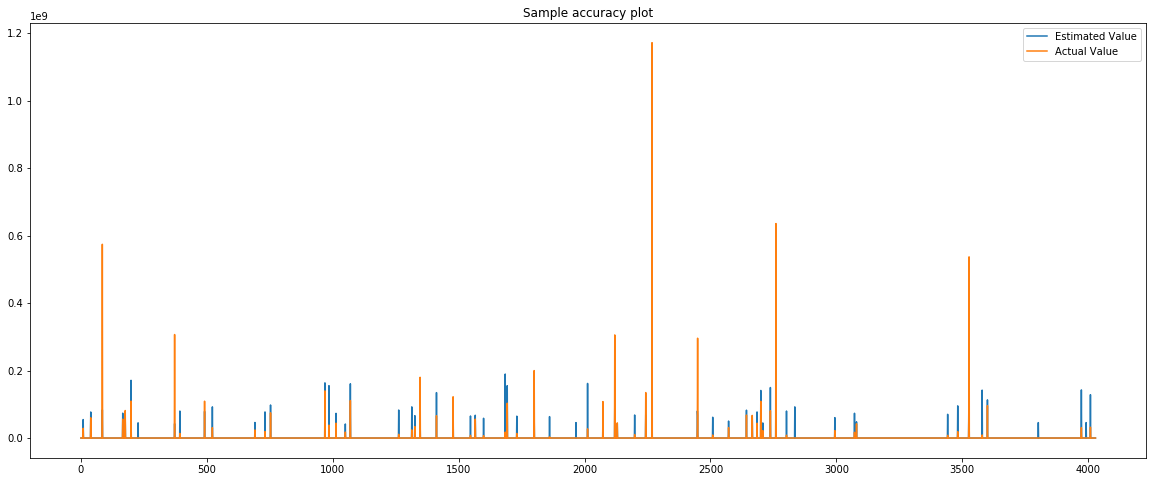

In [80]:
length = len(y_KNN_predicted)
sample_size = 1
index = range(0,length,sample_size)
plt.figure(figsize=(20,8))
plt.plot(index,y_KNN_predicted[0:length:sample_size],index,y_test[0:length:sample_size])
plt.legend(('Estimated Value', 'Actual Value'),loc='upper right')
plt.title('Sample accuracy plot')

### LINEAR REGRESSION

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model_score = cross_validate(LinearRegression(), X_train, y_train, cv = 5, return_train_score=True)
print('Average train score: %.6f'%model_score['train_score'].mean())
print('Average test score: %.6f'%model_score['test_score'].mean())

Average train score: 0.361266
Average test score: 0.332261


In [82]:
#Normal equation
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.35871961235733607
0.2329674275539706


In [83]:
Regression_report_table = Regression_report_table + [['Linear Normal Equation', 'None', lreg.score(X_train, y_train), lreg.score(X_test, y_test)]]

In [84]:
Regression_report_table

[['KNN', {'n_neighbors': 20}, 0.3674156167403323, 0.2662433028538057],
 ['Linear Normal Equation', 'None', 0.35871961235733607, 0.2329674275539706]]

In [85]:
Reg = lreg.fit(X_train, y_train)
y_lreg_predicted = Reg.predict(X_test)

Text(0.5,1,'Sample accuracy plot')

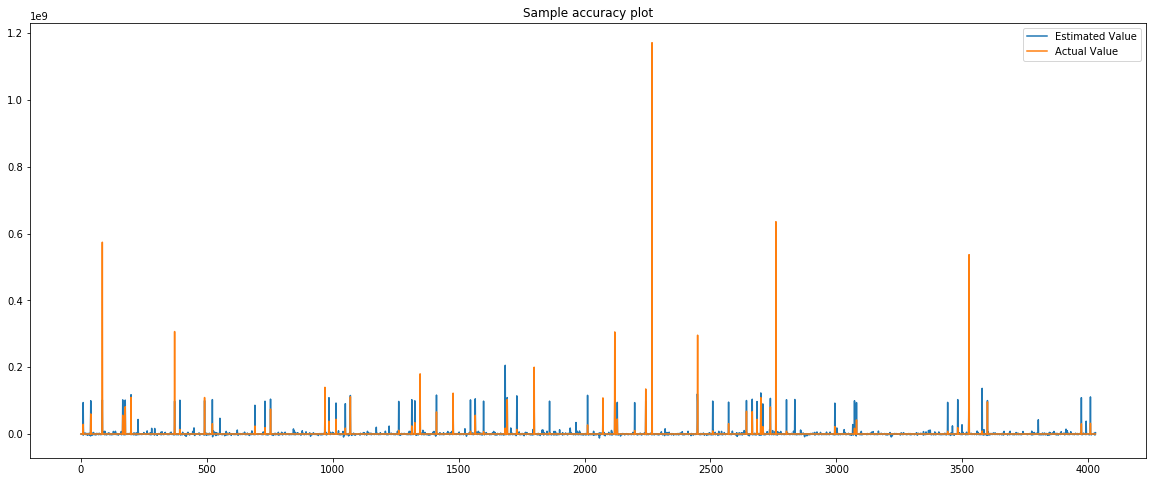

In [86]:
length = len(y_lreg_predicted)
sample_size = 1
index = range(0,length,sample_size)
plt.figure(figsize=(20,8))
plt.plot(index,y_lreg_predicted[0:length:sample_size],index,y_test[0:length:sample_size])
plt.legend(('Estimated Value', 'Actual Value'),loc='upper right')
plt.title('Sample accuracy plot')

### POLYNOMIAL REGRESSION

In [87]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [88]:
model = Pipeline([('poly',PolynomialFeatures()), ('lreg',LinearRegression())])

In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = {'poly__degree': [2]}
grid_poly = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')

In [90]:
grid_poly.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [91]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'poly__degree': 2}
Best cross-validation score: -95397532210616401920.0000


In [92]:
Regression_report_table = Regression_report_table + [['Polynomial', 'degree = 2', grid_poly.score(X_train, y_train), grid_poly.score(X_test, y_test)]]

In [93]:
Regression_report_table

[['KNN', {'n_neighbors': 20}, 0.3674156167403323, 0.2662433028538057],
 ['Linear Normal Equation', 'None', 0.35871961235733607, 0.2329674275539706],
 ['Polynomial', 'degree = 2', 0.6382764818783759, -203375660764011.62]]

### Kernelized SVR

In [94]:
from sklearn.svm import SVR

In [95]:
param_svr_rbf = {'C': [0.01, 1, 100],'gamma': [0.1, 1],'epsilon':[0.01,1,100]} 
grid_SVR_rbf = GridSearchCV(SVR(kernel='rbf'), param_svr_rbf , cv=5, return_train_score=True,n_jobs=-1)

In [96]:
grid_SVR_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 1, 100], 'gamma': [0.1, 1], 'epsilon': [0.01, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [97]:
print("Best parameters: {}".format(grid_SVR_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_SVR_rbf.best_score_))

Best parameters: {'C': 100, 'epsilon': 100, 'gamma': 0.1}
Best cross-validation score: -0.0036


In [98]:
Regression_report_table = Regression_report_table + [['SVM with rbf', grid_SVR_rbf.best_params_ , grid_SVR_rbf.score(X_train, y_train), grid_SVR_rbf.score(X_test, y_test)]]

In [99]:
Regression_report_table 

[['KNN', {'n_neighbors': 20}, 0.3674156167403323, 0.2662433028538057],
 ['Linear Normal Equation', 'None', 0.35871961235733607, 0.2329674275539706],
 ['Polynomial', 'degree = 2', 0.6382764818783759, -203375660764011.62],
 ['SVM with rbf',
  {'C': 100, 'epsilon': 100, 'gamma': 0.1},
  -0.0033725593496238826,
  -0.0038753033290159777]]

In [100]:
Regression_report = pd.DataFrame(Regression_report_table,columns = ['Model_name', 'Model_parameter', 'Train_accuracy', 'Test_accuracy'])

In [101]:
Regression_report

,Model_name,Model_parameter,Train_accuracy,Test_accuracy
0,KNN,{'n_neighbors': 20},0.367416,2.662433e-01
1,Linear Normal Equation,None,0.358720,2.329674e-01
2,Polynomial,degree = 2,0.638276,-2.033757e+14
3,SVM with rbf,"{'C': 100, 'epsilon': 100, 'gamma': 0.1}",-0.003373,-3.875303e-03


In [102]:
Regression_report_plot = Regression_report[['Model_name','Train_accuracy','Test_accuracy']]

In [103]:
Regression_report_plot.index = Regression_report['Model_name']

(-10, 8)

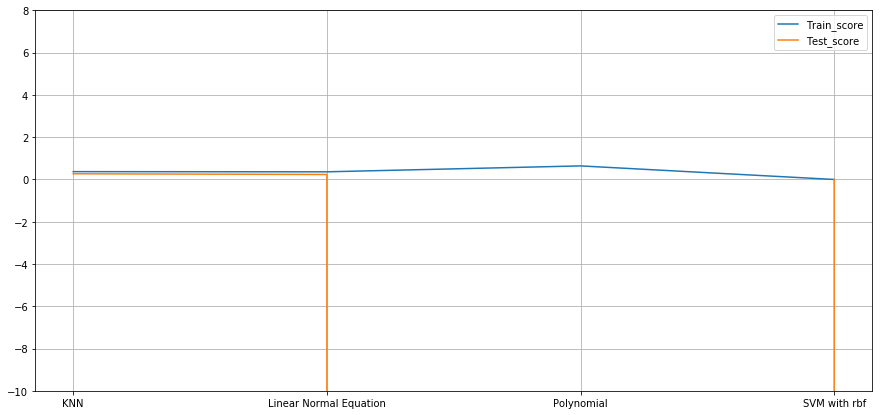

In [104]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(Regression_report_plot['Train_accuracy'],label='Train_score')
plt.plot(Regression_report_plot['Test_accuracy'],label='Test_score')
plt.legend( ['Train_score', 'Test_score'])
plt.ylim(-10,8)

Based on the score, KNN Regressor with the number of neighbors equals to 20 gives the best result. However, the predicted result is also not every accurate. Because the data is biased, maybe linear regression is not a good choice. We may have to combine the models to get a better result. One suggestion is that we may combine logistic regression and linear regression. First, we create a logistic regression to identify whether the revenue is greater than 0 or equal to 0. If a transaction is identified to have the total transaction revenue greater than 0, we will use a linear model to predict the revenue. The linear model will be identify by training on the dataset which includes only instances with revenue greater than 0.

# Clustering with k-means

First, I try to identify the optimal number of clusters for this dataset.

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

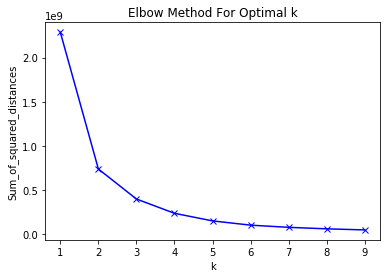

In [107]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the result of the elbow plot, I will choose 3 as the number of clusters.

The next step is to perform clustering with 3 clusters on the feature set.

In [108]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Sample plot

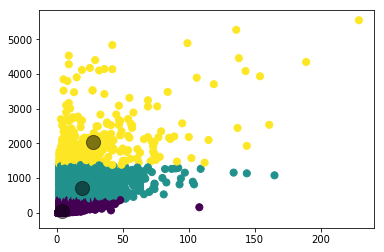

In [109]:
plt.scatter(X.iloc[:, 2], X.iloc[:, 6], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 6], c='black', s=200, alpha=0.5);

With these three clusters, if we try to run the same model on each cluster, we might have significantly different results since each of these clusters has different characteristics.

# Clustering withGeneralizing E–M: Gaussian Mixture Models

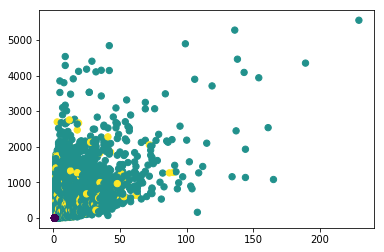

In [110]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X.iloc[:, 2], X.iloc[:, 6], c=labels, s=40, cmap='viridis');

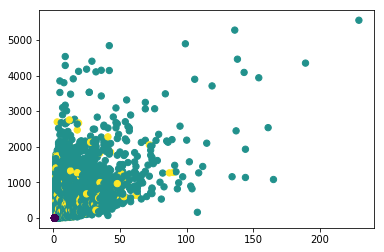

In [111]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X.iloc[:, 2], X.iloc[:, 6], c=labels, s=40, cmap='viridis');

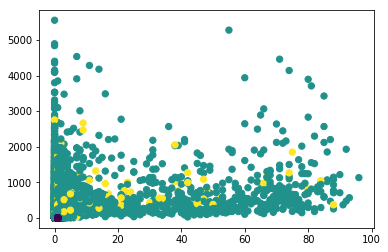

In [112]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X.iloc[:, 5], X.iloc[:, 6], c=labels, s=40, cmap='viridis');

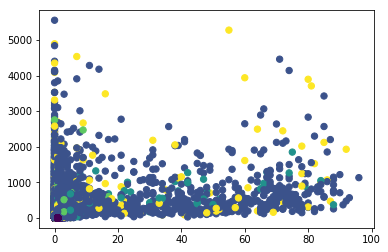

In [113]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
plt.scatter(X.iloc[:, 5], X.iloc[:, 6], c=labels, s=40, cmap='viridis');

Using GaussianMixture, above are sample plot with 3 and 5 components for feature 2-6 and feature 5-6. I cannot find a clear cluster as k-means. In this case, k-means perform better.

### Dimentionally reduction with PCA
Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result.

#### TRY 2 PCAS AND THEN VISUALIZE CLUSTERING

In [114]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X)         # 4. Transform the data to two dimensions

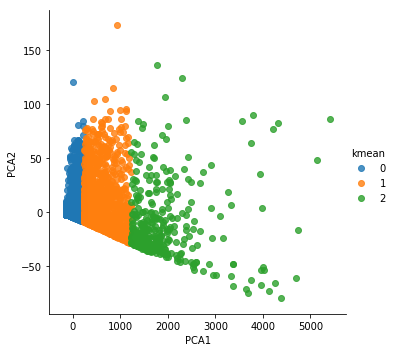

In [115]:
dfX_2D = pd.DataFrame({'PCA1': X_2D[:, 0],'PCA2': X_2D[:, 1],'kmean':y_kmeans})
sns.lmplot("PCA1", "PCA2",hue = 'kmean', data=dfX_2D , fit_reg=False)

In [116]:
dfX_2D.drop(['kmean'],axis=1,inplace=True)

In [117]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfX_2D)
    Sum_of_squared_distances.append(km.inertia_)

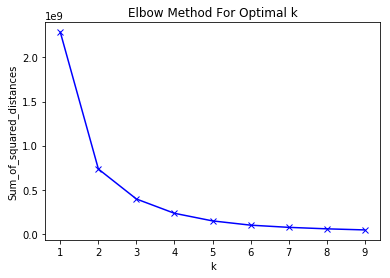

In [118]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [119]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfX_2D)
y_kmeans = kmeans.predict(dfX_2D)

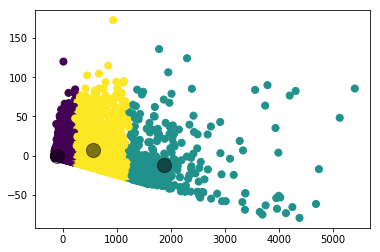

In [120]:
plt.scatter(dfX_2D.iloc[:, 0], dfX_2D.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### FIND NUMBER OF GOOD COMPONENTS

(0, 10)

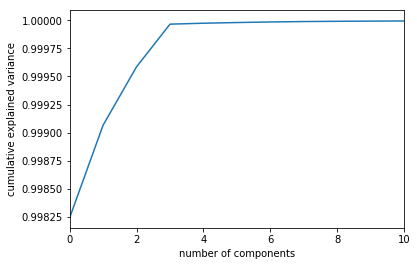

In [121]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0, 10)

Based on the graph above, the best number of components is 3.

The next step is to perform PCA on the feature set and store the result in dfX_3D dataframe.

In [122]:
# from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

# #make a dataframe
# X_scaled = pd.DataFrame(X_scaled)

# #change column names
# X_scaled.columns = X.columns
# X_scaled.head()

In [123]:
# from sklearn.decomposition import PCA
# pca = PCA().fit(X_scaled)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.xlim(0, 10)

In [124]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=3)            # 2. Instantiate the model with hyperparameters
model.fit(X)                      # 3. Fit to data. Notice y is not specified!
X_3D = model.transform(X)         # 4. Transform the data to two dimensions

In [125]:
dfX_3D = pd.DataFrame({'PCA1': X_3D[:, 0],'PCA2': X_3D[:, 1],'PCA3': X_3D[:, 2]})

#### Split new dataset

In [126]:
X= dfX_3D

In [127]:
#Split and scale the dataset:

from sklearn.model_selection import train_test_split
X_train_org,X_test_org,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=10)

from sklearn.preprocessing import StandardScaler ## minmax is better for classification and standard for regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Now, I will use the new data set with 3 components to train the supervised models.

#### KNN REGRESSOR with PCA

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,5,10,15,20]}
print("Parameter grid:\n{}".format(param_grid))
grid_KNR = GridSearchCV(KNR, param_grid, cv=5, return_train_score=True)

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


In [129]:
grid_KNR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [130]:
print("Best parameters: {}".format(grid_KNR.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_KNR.best_score_))

Best parameters: {'n_neighbors': 20}
Best cross-validation score: -0.5098


In [131]:
from sklearn.model_selection import cross_validate
best_model = grid_KNR.best_estimator_
model_score = cross_validate(best_model, X_train, y_train, cv = 5, return_train_score=True)
print('Average train score: %.2f'%model_score['train_score'].mean())
print('Average test score: %.2f'%model_score['test_score'].mean())

Average train score: 0.09
Average test score: -0.51


In [132]:
Regression_report_table2 = [['KNN', grid_KNR.best_params_, grid_KNR.score(X_train, y_train), grid_KNR.score(X_test, y_test)]]

#### LINEAR REGRESSION WITH PCA

In [133]:
model_score = cross_validate(LinearRegression(), X_train, y_train, cv = 5, return_train_score=True)
print('Average train score: %.6f'%model_score['train_score'].mean())
print('Average test score: %.6f'%model_score['test_score'].mean())

Average train score: 0.037423
Average test score: -0.101362


In [134]:
#Normal equation
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.03676381659738226
0.09425701082395467


In [135]:
Regression_report_table2 = Regression_report_table2 + [['Linear Normal Equation', 'None', lreg.score(X_train, y_train), lreg.score(X_test, y_test)]]

In [136]:
Regression_report_table2

[['KNN', {'n_neighbors': 20}, 0.08135515765123669, 0.0849663296780857],
 ['Linear Normal Equation', 'None', 0.03676381659738226, 0.09425701082395467]]

#### POLYNOMIAL REGRESSION WITH PCA

In [137]:
model = Pipeline([('poly',PolynomialFeatures()), ('lreg',LinearRegression())])
param_grid = {'poly__degree': [2]}
grid_poly = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid_poly.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [138]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'poly__degree': 2}
Best cross-validation score: -0.1768
Best parameters: {'poly__degree': 2}
Best cross-validation score: -0.1768


In [139]:
Regression_report_table2 = Regression_report_table2 + [['Polynomial', 'degree = 2', grid_poly.score(X_train, y_train), grid_poly.score(X_test, y_test)]]

In [140]:
Regression_report_table2 

[['KNN', {'n_neighbors': 20}, 0.08135515765123669, 0.0849663296780857],
 ['Linear Normal Equation', 'None', 0.03676381659738226, 0.09425701082395467],
 ['Polynomial', 'degree = 2', 0.045734016525341925, 0.07207451189840319]]

In [141]:
Regression_report2 = pd.DataFrame(Regression_report_table2,columns = ['Model_name', 'Model_parameter', 'Train_accuracy', 'Test_accuracy'])

In [142]:
Regression_report2 # New report table

,Model_name,Model_parameter,Train_accuracy,Test_accuracy
0,KNN,{'n_neighbors': 20},0.081355,0.084966
1,Linear Normal Equation,None,0.036764,0.094257
2,Polynomial,degree = 2,0.045734,0.072075


In [143]:
Regression_report # old report table

,Model_name,Model_parameter,Train_accuracy,Test_accuracy
0,KNN,{'n_neighbors': 20},0.367416,2.662433e-01
1,Linear Normal Equation,None,0.358720,2.329674e-01
2,Polynomial,degree = 2,0.638276,-2.033757e+14
3,SVM with rbf,"{'C': 100, 'epsilon': 100, 'gamma': 0.1}",-0.003373,-3.875303e-03


After apply PCA on the data, the same model gets lower training and testing score (significantly lower).

Which number of components gives the optimal trade-off between bias and variance? To answer this question, I will look at Linear Regression and KNN Regression to see if changing the number of PCA might help improving the results.

In [144]:
X = df[['visitNumber','totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim','totals_timeOnSite','totals_transactions', 'totals_visits',
        'value_APAC', 'value_Central America', 'value_EMEA','value_North America', 'value_South America', 'value_unknown',
        'hitNumber',
        'continent_(not set)', 'continent_Africa','continent_Americas', 'continent_Asia', 'continent_Europe','continent_Oceania', 
        'deviceCategory_desktop', 'deviceCategory_mobile','deviceCategory_tablet',
        'medium_(none)', 'medium_affiliate','medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
        'channelGrouping_Direct', 'channelGrouping_Display', 'channelGrouping_Organic Search', 
        'channelGrouping_Paid Search', 'channelGrouping_Referral', 'isMobile_True','isMobile_False']]

In [145]:
X_train_org,X_test_org,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=10)
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

LINEAR REGRESSION

In [146]:
from sklearn.pipeline import make_pipeline

def model(n_components = 3, **kwargs):
    return make_pipeline(PCA(n_components), 
                       LinearRegression(**kwargs))

[[-3.10522869e-03  3.37896779e-02 -5.24676279e-01  2.33243289e-02
   5.23124964e-02]
 [ 5.52675214e-03  6.69096105e-02 -9.20821744e-01  4.08403883e-02
   1.00673242e-01]
 [ 3.68076611e-03  8.01219036e-02 -1.27405930e+00  4.87735101e-02
   1.26019475e-01]
 [ 2.20047139e-03  8.40996820e-02 -1.33197269e+00  4.97909774e-02
   1.30567560e-01]
 [ 1.43515053e-03  8.72617918e-02 -1.34906058e+00  5.27894448e-02
   1.34083917e-01]
 [ 3.67000533e-04  8.68028306e-02 -1.40046895e+00  5.38689116e-02
   1.34414750e-01]
 [-1.21249188e-04  8.69872617e-02 -1.45557246e+00  5.34677322e-02
   1.34585453e-01]
 [-3.93732772e-03  8.85622216e-02 -1.45029593e+00  5.45026958e-02
   1.35136194e-01]]


Text(0,0.5,'score')

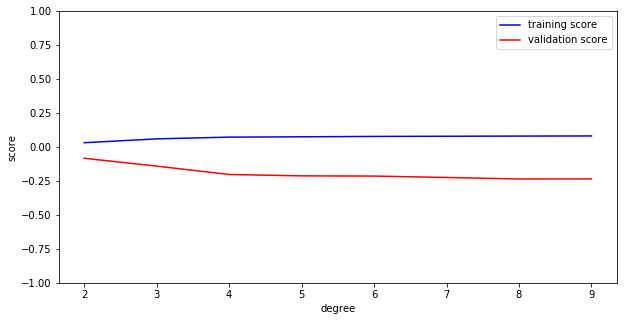

In [147]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression

n_components = np.arange(2,10)
train_score, val_score = validation_curve(model(), X_train, y_train, 'pca__n_components',n_components, cv=5)
print(val_score)
plt.subplots(figsize =(10,5))
plt.plot(n_components, np.mean(train_score, 1), color='blue', label='training score')
plt.plot(n_components, np.mean(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(-1, 1)
plt.xlabel('degree')
plt.ylabel('score')

KNN REGRESSION

In [148]:
from sklearn.pipeline import make_pipeline

def model(n_components = 3, **kwargs):
    return make_pipeline(PCA(n_components), 
                       KNeighborsRegressor(**kwargs,n_neighbors = 20))

[[ 0.02722151  0.07505935 -1.87447509  0.1400347   0.1768148 ]
 [-0.11720107  0.03245872 -1.3661876   0.12397516  0.071133  ]
 [-0.14727346  0.06130326 -1.61042016  0.1111353   0.15737116]
 [-0.09357309  0.0825306  -1.62777021  0.11365281  0.18105685]
 [-0.04382873  0.07240845 -1.29704204  0.10335314  0.1700158 ]
 [ 0.07405535  0.07841982 -1.75082507  0.06299306  0.15477937]
 [ 0.06985006  0.08439115 -1.27854114  0.09661578  0.18215546]
 [ 0.13487295  0.09044222 -1.39488505  0.0891458   0.17683981]]


Text(0,0.5,'score')

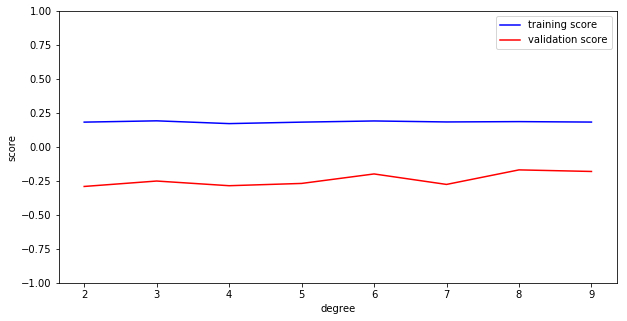

In [149]:
from sklearn.model_selection import validation_curve

n_components = np.arange(2,10)
train_score, val_score = validation_curve(model(), X_train, y_train, 'pca__n_components',n_components, cv=5)
print(val_score)
plt.subplots(figsize =(10,5))
plt.plot(n_components, np.mean(train_score, 1), color='blue', label='training score')
plt.plot(n_components, np.mean(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(-1, 1)
plt.xlabel('degree')
plt.ylabel('score')

Both graph shows it does not seem that changing the number of components would help in this case, for both models.

# Dimensionailty reduction with kernel PCA

I will use PCA with rbf kernel to perform dimensionality reduction (3 components) and then rerun KNN regression, Linear Regression and Polynomial Regression. Then I will compare the result with report_table 1 and 2

In [150]:
X = df[['visitNumber','totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim','totals_timeOnSite','totals_transactions', 'totals_visits',
        'value_APAC', 'value_Central America', 'value_EMEA','value_North America', 'value_South America', 'value_unknown',
        'hitNumber',
        'continent_(not set)', 'continent_Africa','continent_Americas', 'continent_Asia', 'continent_Europe','continent_Oceania', 
        'deviceCategory_desktop', 'deviceCategory_mobile','deviceCategory_tablet',
        'medium_(none)', 'medium_affiliate','medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
        'channelGrouping_Direct', 'channelGrouping_Display', 'channelGrouping_Organic Search', 
        'channelGrouping_Paid Search', 'channelGrouping_Referral', 'isMobile_True','isMobile_False']]

In [151]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 3, kernel="rbf", gamma=0.04)
X_3D = rbf_pca.fit_transform(X)
dfX_3D = pd.DataFrame({'PCA1': X_3D[:, 0],'PCA2': X_3D[:, 1],'PCA3': X_3D[:, 2]})

### Split new dataset

In [152]:
X= dfX_3D

In [153]:
#Split and scale the dataset:
from sklearn.model_selection import train_test_split
X_train_org,X_test_org,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=12)

from sklearn.preprocessing import StandardScaler ## minmax is better for classification and standard for regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### KNN REGRESSOR with kernel PCA

In [154]:
KNR = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,5,10,15,20]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


In [155]:
grid_KNR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [156]:
print("Best parameters: {}".format(grid_KNR.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_KNR.best_score_))

Best parameters: {'n_neighbors': 20}
Best cross-validation score: -0.0180


In [157]:
from sklearn.model_selection import cross_validate
best_model = grid_KNR.best_estimator_
model_score = cross_validate(best_model, X_train, y_train, cv = 5, return_train_score=True)
print('Average train score: %.2f'%model_score['train_score'].mean())
print('Average test score: %.2f'%model_score['test_score'].mean())

Average train score: 0.08
Average test score: -0.02


In [158]:
Regression_report_table3 = [['KNN', grid_KNR.best_params_, grid_KNR.score(X_train, y_train), grid_KNR.score(X_test, y_test)]]

#### LINEAR REGRESSION with kernel PCA

In [159]:
model_score = cross_validate(LinearRegression(), X_train, y_train, cv = 5, return_train_score=True)
print('Average train score: %.6f'%model_score['train_score'].mean())
print('Average test score: %.6f'%model_score['test_score'].mean())

Average train score: 0.002597
Average test score: 0.002405


In [160]:
#Normal equation
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.0025856252788265532
0.002352769554943235


In [161]:
Regression_report_table3 = Regression_report_table3 + [['Linear Normal Equation', 'None', lreg.score(X_train, y_train), lreg.score(X_test, y_test)]]

#### POLYNOMIAL REGRESSION WITH PCA

In [162]:
model = Pipeline([('poly',PolynomialFeatures()), ('lreg',LinearRegression())])
param_grid = {'poly__degree': [2]}
grid_poly = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid_poly.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [163]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'poly__degree': 2}
Best cross-validation score: 0.0030
Best parameters: {'poly__degree': 2}
Best cross-validation score: 0.0030


In [164]:
Regression_report_table3 = Regression_report_table3 + [['Polynomial', 'degree = 2', grid_poly.score(X_train, y_train), grid_poly.score(X_test, y_test)]]

In [165]:
Regression_report_table3

[['KNN', {'n_neighbors': 20}, 0.07370760979273971, 0.001178936520796925],
 ['Linear Normal Equation',
  'None',
  0.0025856252788265532,
  0.002352769554943235],
 ['Polynomial', 'degree = 2', 0.003226773964593699, 0.0029705297397869534]]

In [166]:
Regression_report3 = pd.DataFrame(Regression_report_table3,columns = ['Model_name', 'Model_parameter', 'Train_accuracy', 'Test_accuracy'])

In [167]:
Regression_report3

,Model_name,Model_parameter,Train_accuracy,Test_accuracy
0,KNN,{'n_neighbors': 20},0.073708,0.001179
1,Linear Normal Equation,None,0.002586,0.002353
2,Polynomial,degree = 2,0.003227,0.002971


In [168]:
Regression_report2

,Model_name,Model_parameter,Train_accuracy,Test_accuracy
0,KNN,{'n_neighbors': 20},0.081355,0.084966
1,Linear Normal Equation,None,0.036764,0.094257
2,Polynomial,degree = 2,0.045734,0.072075


In [170]:
Regression_report

,Model_name,Model_parameter,Train_accuracy,Test_accuracy
0,KNN,{'n_neighbors': 20},0.367416,2.662433e-01
1,Linear Normal Equation,None,0.358720,2.329674e-01
2,Polynomial,degree = 2,0.638276,-2.033757e+14
3,SVM with rbf,"{'C': 100, 'epsilon': 100, 'gamma': 0.1}",-0.003373,-3.875303e-03


The result for the models generaly get worse after dimensionaility reduction. The problem might be when using dimensionaility reduction, we have lost a lot of important information. This makes the models generally perform worse on the data set with reduced dimension. Overall, all the applied models does not fit the data well.